### Deteksi Tepi Menggunakan Operator Prewitt

In [1]:
#import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

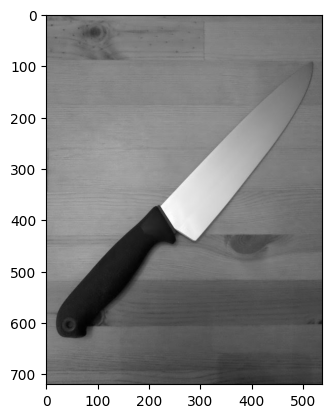

In [3]:
#read image grayscale
image = cv2.imread('knife.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [4]:
#kernel operator prewitt

Hx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
Hy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

In [6]:
# Fungsi konvolusi
def convolve(X, F):
    X_height = X.shape[0] #memberikan tinggi(jumlah baris) dari citra.
    X_width = X.shape[1] #memberikan lebar(jumlah kolom) dari citra.
    
    F_height = F.shape[0] #kernel sobel.
    F_width = F.shape[1] #kernel sobel.
    
    #jarak dari tengah kernel ke tepi atas/bawah dan kiri/kanan.
    H = (F_height - 1) // 2 #menghitung setengah ukuran kernel (dibulatkan kebawah).
    W = (F_width - 1) // 2 #lebar kernel.
    
    out = np.zeros((X_height, X_width)) #membuat matriks kosong dengan ukuran sama seperti citra input.
    
    for i in np.arange(H, X_height-H): #loop indeks baris, dimulai dari H sampai X_height-H.
        for j in np.arange(W, X_width-W): #loop indeks kolom, dimulai dari W sampai X_width-W.
            sum = 0 #menyimpan hasil perkalian piksel citra dan kernel
            for k in np.arange(-H, H+1): #pergeseran kernel baris
                for l in np.arange(-W, W+1): #pergeseran kernel kolom
                    a = X[i+k, j+l] #mengambil nilai piksel dari citra posisi
                    w = F[H+k, W+l] #mengambil bobot kernel
                    sum += (w * a) #perkalian nilai piksel dan bobot dan disimpan ke sum
            out[i,j] = sum
    return out

In [7]:
# Terapkan kernel Prewitt
prew_x = convolve(image, Hx) / 3.0  # Normalisasi hasil konvolusi
prew_y = convolve(image, Hy) / 3.0  # Normalisasi hasil konvolusi

In [8]:
# Hitung magnitude gradient
prew_out = np.sqrt(prew_x**2 + prew_y**2)
prew_out = (prew_out / np.max(prew_out)) * 255

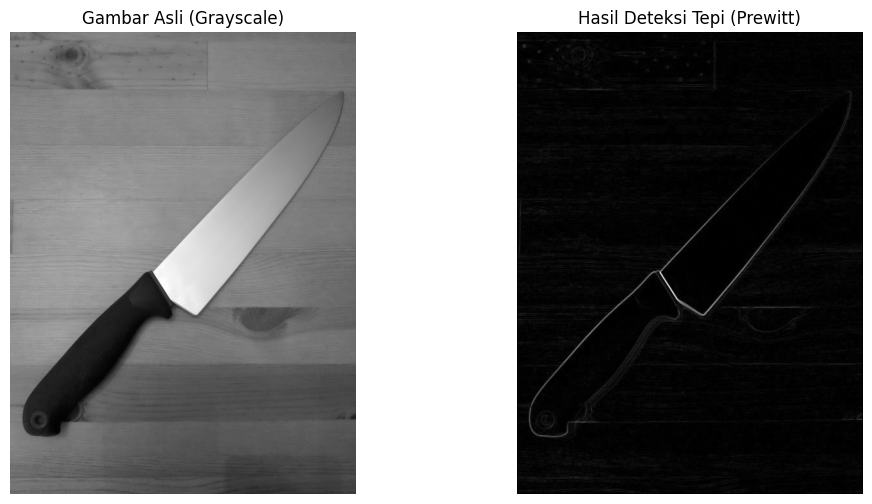

In [9]:

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prew_out, cmap='gray')
plt.title('Hasil Deteksi Tepi (Prewitt)')
plt.axis('off')

plt.show()